In [23]:
import numpy as np
from matplotlib import pyplot as plt
import mglearn
import pandas as pd
import os, os.path
length = len(os.listdir('datos_variaciones'))
variation_data = [pd.read_csv(f'datos_variaciones/datos{i}.csv') for i in range(length)]
variation_data

[                x_1           x_2  y
 0     -9.818214e+13 -8.443522e+13  0
 1     -1.807245e+14 -1.785816e+14  1
 2      1.923438e+14 -1.850357e+14  0
 3      1.751450e+14 -2.499599e+14  1
 4     -6.136919e+13 -2.107125e+14  0
 ...             ...           ... ..
 16379 -2.012466e+14 -1.465491e+14  0
 16380 -4.526755e+13 -2.100609e+14  1
 16381 -6.813660e+13 -1.944638e+14  1
 16382 -1.936259e+13 -4.351950e+13  0
 16383 -4.400607e+13 -1.807922e+13  1
 
 [16384 rows x 3 columns],
                 x_1           x_2  y
 0      1.702558e+14 -3.088741e+14  1
 1      7.675580e+13 -3.031700e+14  1
 2     -4.684458e+13 -1.531753e+14  1
 3     -3.194771e+13 -2.482119e+14  0
 4     -3.841852e+13 -1.832842e+14  0
 ...             ...           ... ..
 16379 -1.223985e+14  2.273362e+11  1
 16380  2.517933e+13 -1.809080e+14  1
 16381  7.123181e+13 -2.669652e+14  0
 16382  4.354534e+13 -5.467189e+13  0
 16383 -7.503196e+13 -3.071611e+14  0
 
 [16384 rows x 3 columns],
                 x_1          

In [4]:
'''Código para importar modelo'''
#from joblib import load

#abc = load('models/AdaBoost Classifier.joblib')
#%store abc

Stored 'abc' (AdaBoostClassifier)


Score for AdaBoost Classifier 0 is: 0.4963384865744508
Score for AdaBoost Classifier 1 is: 0.49776240846216435
Score for AdaBoost Classifier 2 is: 0.491659886086249
Score for AdaBoost Classifier 3 is: 0.514646053702197
Score for AdaBoost Classifier 4 is: 0.5063059397884458
Score for AdaBoost Classifier 5 is: 0.4971521562245728
Score for AdaBoost Classifier 6 is: 0.5301057770545159
Score for AdaBoost Classifier 7 is: 0.5209519934906428
Score for AdaBoost Classifier 8 is: 0.5526851098454028
Score for AdaBoost Classifier 9 is: 0.565907241659886
Score for AdaBoost Classifier 10 is: 0.5789259560618389
Score for AdaBoost Classifier 11 is: 0.5929617575264443
Score for AdaBoost Classifier 12 is: 0.6108624898291294
Score for AdaBoost Classifier 13 is: 0.646053702196908
Score for AdaBoost Classifier 14 is: 0.6688364524003255
Score for AdaBoost Classifier 15 is: 0.6788039056143206
Score for AdaBoost Classifier 16 is: 0.718673718470301
Score for AdaBoost Classifier 17 is: 0.7418633034987795
Score 

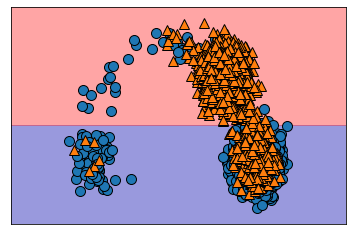

In [25]:
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import AdaBoostClassifier

abc_scores = []
abc_models = []
X_train_list = []
y_train_list = []
for i in range(length):
    X = variation_data[i].values[:,:2]
    y = variation_data[i].values[:,2]
    transformer = RobustScaler(quantile_range=(0.25,0.75)).fit(X)
    X = transformer.transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)
    X_train_list.append(X_train)
    y_train_list.append(y_train)
    abc = AdaBoostClassifier(n_estimators = 5)
    abc.fit(X_train, y_train)
    models.append(abc)
    current_score = abc.score(X_test,y_test)
    print(f'Score for AdaBoost Classifier', i, 'is:', current_score)
    scores.append(current_score)
max_index = np.asarray(scores).argmax()
print('The best score is',scores[max_index],'on index',max_index)
mglearn.plots.plot_2d_separator(models[max_index],X_train_list[max_index],fill=True,alpha=.4)
mglearn.discrete_scatter(X_train_list[max_index][:,0],X_train_list[max_index][:,1],y_train_list[max_index])

Score for Support Vector Classifier 0 is: 0.5012205044751831
Score for Support Vector Classifier 1 is: 0.4945077298616762
Score for Support Vector Classifier 2 is: 0.4934906427990236
Score for Support Vector Classifier 3 is: 0.5193246541903987
Score for Support Vector Classifier 4 is: 0.4955248169243287
Score for Support Vector Classifier 5 is: 0.5115947925142392
Score for Support Vector Classifier 6 is: 0.524206672091131
Score for Support Vector Classifier 7 is: 0.5331570382424735
Score for Support Vector Classifier 8 is: 0.5526851098454028
Score for Support Vector Classifier 9 is: 0.5652969894222946
Score for Support Vector Classifier 10 is: 0.5779088689991864
Score for Support Vector Classifier 11 is: 0.5929617575264443
Score for Support Vector Classifier 12 is: 0.6094385679414158
Score for Support Vector Classifier 13 is: 0.6450366151342555
Score for Support Vector Classifier 14 is: 0.669446704637917
Score for Support Vector Classifier 15 is: 0.6783970707892596
Score for Support Ve

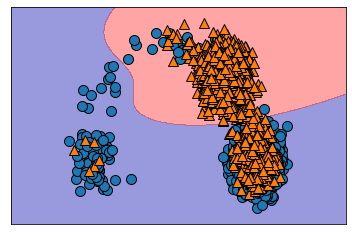

In [26]:
from sklearn.svm import SVC

svc_scores = []
svc_models = []
X_train_list = []
y_train_list = []
for i in range(length):
    X = variation_data[i].values[:,:2]
    y = variation_data[i].values[:,2]
    transformer = RobustScaler(quantile_range=(0.25,0.75)).fit(X)
    X = transformer.transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)
    X_train_list.append(X_train)
    y_train_list.append(y_train)
    svc = SVC(C=0.58, kernel='rbf',probability=True)
    svc.fit(X_train, y_train)
    svc_models.append(svc)
    current_score = svc.score(X_test,y_test)
    print(f'Score for Support Vector Classifier', i, 'is:', current_score)
    svc_scores.append(current_score)
max_index = np.asarray(svc_scores).argmax()
print('The best score is',svc_scores[max_index],'on index',max_index)
mglearn.plots.plot_2d_separator(svc_models[max_index],X_train_list[max_index],fill=True,alpha=.4)
mglearn.discrete_scatter(X_train_list[max_index][:,0],X_train_list[max_index][:,1],y_train_list[max_index])

In [28]:
%store models
%store svc_models

Stored 'models' (list)
Stored 'svc_models' (list)
